Функции, группирующие данные

К этой категории относится единственная функция:

groupby()

Функция groupby()

Функция groupby() используется для группировки смежных элементов итерируемого объекта. Она возвращает итератор, содержащий кортежи, каждый из которых состоит из двух элементов: первый — значение, характеризующее группу, второй — итератор, содержащий элементы соответствующей группы.

iterable — итерируемый объект
key — функция, вычисляющая значение, характеризующее группу

Если ключ key не указан или равен None, ключом по умолчанию является функция тождественности, которая возвращает элемент без изменений.

In [1]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers)

print(type(group_iter))
print(*group_iter, sep='\n')

<class 'itertools.groupby'>
(1, <itertools._grouper object at 0x000001989151E8C0>)
(7, <itertools._grouper object at 0x0000019891883EE0>)
(15, <itertools._grouper object at 0x0000019891883FA0>)
(7, <itertools._grouper object at 0x0000019891880EE0>)


Как мы видим, не только сам результат вызова функции groupby() является итератором, но и вторые элементы результирующих кортежей также являются итераторами. Чтобы взглянуть на элементы, содержащиеся в данных итераторах, мы можем воспользоваться любым известным нам способом, например, преобразованием в список.

In [2]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers)

for key, values in group_iter:
    print(f'{key}: {list(values)}')            # преобразуем итератор в список

1: [1, 1, 1]
7: [7, 7, 7, 7]
15: [15]
7: [7, 7, 7]


Приведенное ниже изображение демонстрирует работу функции groupby() на примере, указанном выше:

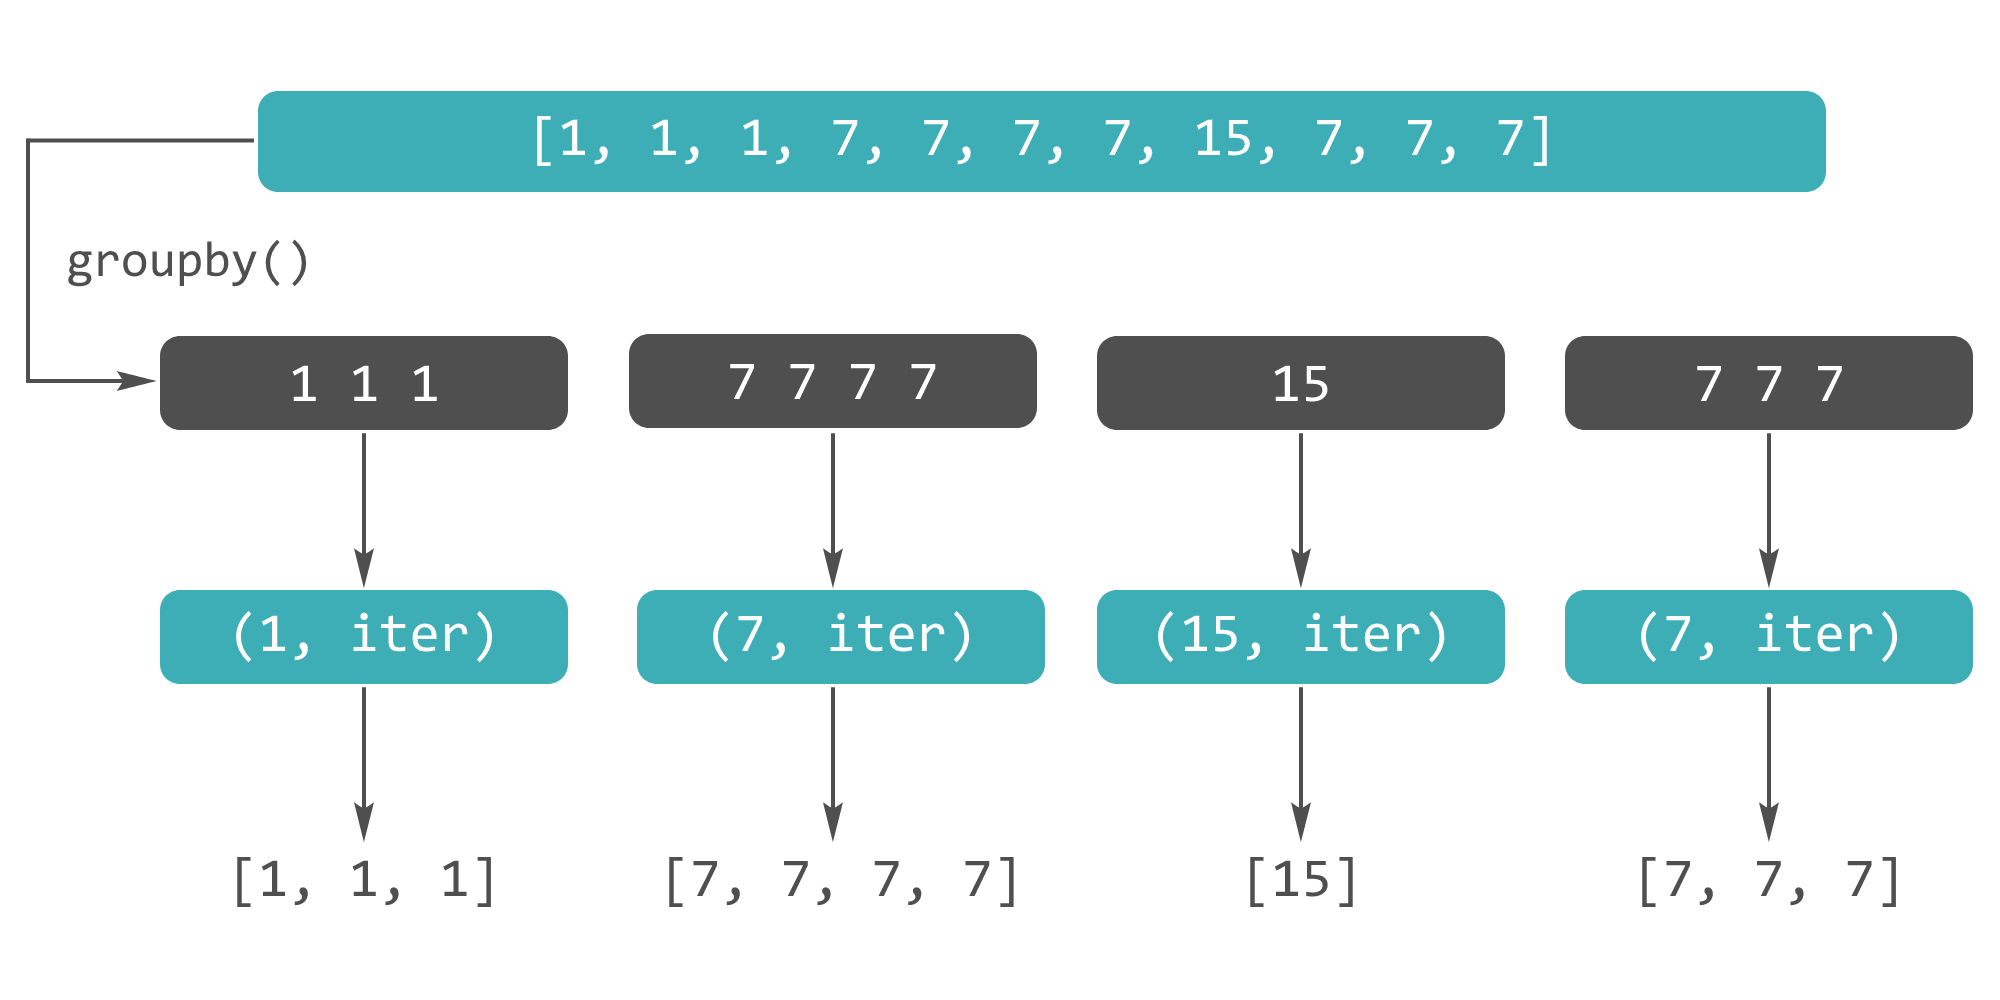

In [3]:
from functions import picture
picture('Новый проект (1) (11).png')

Приведенный выше пример демонстрирует особенность работы функции groupby(). Поскольку список numbers не является отсортированным, то у нас получаются разные группы для равных чисел. В частности, мы получили две группы для числа 7.

Группой называется множество равных (по признаку) и смежных элементов.

Если бы мы хотели получить группы, в которые включены все соответствующие элементы, нам бы пришлось сначала отсортировать список.

In [4]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(sorted(numbers))

for key, values in group_iter:
    print(f'{key}: {list(values)}')            # преобразуем итератор в список

1: [1, 1, 1]
7: [7, 7, 7, 7, 7, 7, 7]
15: [15]


Встроенная функция sorted() возвращает новый отсортированный список. Вместо функции sorted() мы могли использовать списочный метод sort(), который сортирует список на месте.

Таким образом, нужно запомнить правило: если мы хотим, чтобы все равные элементы попали в одну группу, необходимо сначала отсортировать начальные данные.

Использование аргумента key

Как уже было сказано в начале урока, функция groupby() принимает в качестве необязательного аргумента key — функцию, которая вычисляет по элементу значение группирующего признака.

С аргументом key мы уже сталкивались много раз в прошлом, в таких функциях как min(), max(), sorted().

In [5]:
numbers = [-81, 2, -6, -3, 9, -17, -8, -6, 7]

print(min(numbers, key=abs))                       # минимальный элемент по модулю
print(max(numbers, key=lambda num: num**2))        # элемент с максимальным квадратом
print(sorted(numbers, key=abs))                    # сортировка элементов по модулю

2
-81
[2, -3, -6, -6, 7, -8, 9, -17, -81]


Аналогичным образом работает аргумент key у функции groupby().

In [6]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers, key=lambda num: num < 10)

for key, values in group_iter:
    print(f'{key}: {list(values)}')

True: [1, 1, 1, 7, 7, 7, 7]
False: [15]
True: [7, 7, 7]


Первые семь чисел образуют первую группу, поскольку для всех них функция key возвращает значение True. Элемент со значением 15 — образует вторую группу, так как для него функция key уже возвращает значение False, отличное от True. Наконец, следующие три элемента вновь образуют новую группу, так как для них функция key снова возвращает значение True, отличное от False.

Для того чтобы у нас было всего две группы, необходима предварительная сортировка по той же ключевой функции.

In [7]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

key_func = lambda num: num < 10

group_iter = groupby(sorted(numbers, key=key_func), key=key_func)

for key, values in group_iter:
    print(f'{key}: {list(values)}')

False: [15]
True: [1, 1, 1, 7, 7, 7, 7, 7, 7, 7]


Таким образом, нужно запомнить правило: если мы хотим, чтобы все элементы для которых ключевая функция key возвращает одно и то же значение попали в одну группу, необходимо сначала отсортировать начальные данные по той же ключевой функции.

Примеры использования функции groupby()

Пример 1. Удалить подряд идущие одинаковые элементы в списке.

Решение. Будем использовать функцию groupby().

In [8]:
from itertools import groupby

data = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'A', 'A', 'B', 'B', 'B']

result = [key for key, group in groupby(data)] 

print(result)

['A', 'B', 'C', 'D', 'A', 'B']


Пример 2. Получить список с уникальными элементами списка.

In [9]:
from itertools import groupby

data = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'D', 'A', 'A', 'B', 'B', 'B']

result = [key for key, group in groupby(sorted(data))] 

print(result)

['A', 'B', 'C', 'D']


Для того чтобы работал приведенный выше код, нужно, чтобы элементы списка были сравнимы друг с другом.

Пример 3. Определить, какой символ встречается чаще всего в строке.

In [54]:
from itertools import groupby

data = 'aaabcdaabcccdddcccccccbrttbcc'
group_iter = groupby(sorted(data))

max_result = max(group_iter, key=lambda tpl: sum(1 for i in tpl[1]))

print('Символ встречающийся чаще всего в строке:', max_result[0])

Символ встречающийся чаще всего в строке: c


Не забываем, что функция groupby() возвращает итератор, содержащий кортежи вида (key, group), при этом group также является итератором. Функция len() не работает с итераторами, поэтому для подсчета длины итератора мы используем выражение sum(1 for i in group).

Обратите также внимание на то, что после вызова функции max() наш итератор group_iter становится пустым. Если нам могут понадобиться данные позже, они должны быть сохранены в виде списка:

In [55]:
from itertools import groupby

data = 'aaabcdaabcccdddcccccccbrttbcc'
group_iter = groupby(sorted(data))

saved_data = [(key, list(group)) for key, group in group_iter]

max_result = max(saved_data, key=lambda tpl: len(tpl[1]))       # можем уже использовать len()
min_result = min(saved_data, key=lambda tpl: len(tpl[1]))

print('Символ встречающийся чаще всего в строке:', max_result[0])
print('Символ встречающийся реже всего в строке:', min_result[0])

Символ встречающийся чаще всего в строке: c
Символ встречающийся реже всего в строке: r


Функции max(), min(), в случае если максимальных/минимальных элементов несколько, возвращают первый из них.

Примечания

Примечание 1. Функция groupby() возвращает итератор, содержащий кортежи вида (key, group), при этом group также является итератором. Важным является то, что, если мы получили итератор, содержащий элементы очередной группы, это значит, что все итераторы, содержащие элементы предшествующих групп, уже пусты.

In [66]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers)
# print(group_iter)
# for key, values in group_iter:
#     print(f'{key}: {list(values)}')
# 1: [1, 1, 1]
# 7: [7, 7, 7, 7]
# 15: [15]
# 7: [7, 7, 7]

group1 = next(group_iter)[1]
group2 = next(group_iter)[1]
group3 = next(group_iter)[1]

print(list(group1))
print(list(group2))
print(list(group3))

[]
[7, 7, 7, 7]


С другой стороны,

In [67]:
from itertools import groupby

numbers = [1, 1, 1, 7, 7, 7, 7, 15, 7, 7, 7]

group_iter = groupby(numbers)

group1 = next(group_iter)[1]
print(list(group1))

group2 = next(group_iter)[1]
print(list(group2))

group3 = next(group_iter)[1]
print(list(group3))

[1, 1, 1]
[7, 7, 7, 7]
[15]


Примечание 2. Функция sorted() работает с любым итерируемым объектом, но возвращает всегда отсортированный список.

In [68]:
data = [1, 9, 5, 3, 4, 10, 2, 6]

print(sorted(data))
print(sorted(set(data)))
print(sorted(iter(data)))

[1, 2, 3, 4, 5, 6, 9, 10]
[1, 2, 3, 4, 5, 6, 9, 10]
[1, 2, 3, 4, 5, 6, 9, 10]


In [69]:
from itertools import groupby

key_func = lambda x: x > 5
numbers = [7, 6, 1, 1, 5, 10, 11, 2, 3, 4]

groups = groupby(numbers, key=key_func)

for i, group in groups:
    print(i, *group)

True 7 6
False 1 1 5
True 10 11
False 2 3 4


In [70]:
from itertools import groupby

key_func = lambda x: x % 2
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

groups = groupby(sorted(numbers, key=key_func), key=key_func)
for i, group in groups:
    print(i, *group)

0 2 4 6 8 10
1 1 3 5 7 9


Вам доступен именованный кортеж Person, который содержит данные о человеке. Первым элементом именованного кортежа является имя человека, вторым — возраст, третьим — рост. Также доступен список persons, содержащий эти кортежи.

Дополните приведенный ниже код, чтобы он сгруппировал людей из данного списка по их росту и вывел полученные группы. Для каждой группы сначала должен быть указан рост, а затем через запятую перечислены имена людей, имеющих соответствующий рост. Группы должны быть расположены в порядке увеличения роста, каждая на отдельной строке, имена в группах — в алфавитном порядке, в следующем формате:

<рост>: <имя>, <имя>, ...

In [76]:
from collections import namedtuple
from itertools import groupby

Person = namedtuple('Person', ['name', 'age', 'height'])

persons = [Person('Tim', 63, 193), Person('Eva', 47, 158),
           Person('Mark', 71, 172), Person('Alex', 45, 193),
           Person('Jeff', 63, 193), Person('Ryan', 41, 184),
           Person('Ariana', 28, 158), Person('Liam', 69, 193)]

sorted_persons = sorted(persons, key=lambda x:x.height)
# print(sorted_persons)

grouped_persons = groupby(sorted_persons, key=lambda x:x.height)
for k, group in grouped_persons:
    # print(k, *group)
    print(str(k)+':',', '.join(sorted([i.name for i in group])))

158: Ariana, Eva
172: Mark
184: Ryan
193: Alex, Jeff, Liam, Tim


In [77]:
from collections import namedtuple
from itertools import groupby

Person = namedtuple('Person', ['name', 'age', 'height'])

persons = [Person('Tim', 63, 193), Person('Eva', 47, 158),
           Person('Mark', 71, 172), Person('Alex', 45, 193),
           Person('Jeff', 63, 193), Person('Ryan', 41, 184),
           Person('Ariana', 28, 158), Person('Liam', 69, 193)]


persons.sort(key=lambda x: (x.height, x.name))
groups = groupby(persons, key=lambda x: x.height)

for key, tpl in groups:
    print(f'{key}: {", ".join(i.name for i in tpl)}')

158: Ariana, Eva
172: Mark
184: Ryan
193: Alex, Jeff, Liam, Tim


Вам доступен именованный кортеж Student, который содержит данные об ученике. Первым элементом именованного кортежа является фамилия ученика, вторым — имя, третьим — класс. Также доступен список students, содержащий эти кортежи.

Дополните приведенный ниже код, чтобы он вывел наиболее часто встречаемое имя среди учеников из данного списка.

Примечание. Гарантируется, что искомое имя единственное.

In [95]:
from collections import namedtuple
from itertools import groupby

Student = namedtuple('Student', ['surname', 'name', 'grade'])

students = [Student('Гагиев', 'Александр', 10), Student('Дедегкаев', 'Илья', 11), Student('Кодзаев', 'Георгий', 10),
            Student('Набокова', 'Алиса', 11), Student('Кораев', 'Артур', 10), Student('Шилин', 'Александр', 11),
            Student('Уртаева', 'Илина', 11), Student('Салбиев', 'Максим', 10), Student('Капустин', 'Илья', 11),
            Student('Гудцев', 'Таймураз', 11), Student('Перчиков', 'Максим', 10), Student('Чен', 'Илья', 11),
            Student('Елькина', 'Мария', 11),Student('Макоев', 'Руслан', 11), Student('Албегов', 'Хетаг', 11),
            Student('Щербак', 'Илья', 10), Student('Идрисов', 'Баграт', 11), Student('Гапбаев', 'Герман', 10),
            Student('Цивинская', 'Анна', 10), Student('Туткевич', 'Юрий', 11), Student('Мусиков', 'Андраник', 11),
            Student('Гадзиев', 'Георгий', 11), Student('Белов', 'Юрий', 11), Student('Акоева', 'Диана', 11),
            Student('Денисов', 'Илья', 11), Student('Букулова', 'Диана', 10), Student('Акоева', 'Лера', 11)]

key_func = lambda x:x.name

sorted_students = sorted(students, key=key_func)
# print(sorted_students)

grouped_students = groupby(sorted_students, key=key_func)
# for i, group in grouped_students:
#     print(i, *group)

max_student = max(grouped_students, key=lambda tpl: sum(1 for _ in tpl[1]))
print(max_student[0])

Илья


Группы слов
Напишите программу, которая группирует слова по их длине.

Формат входных данных
На вход программе подается последовательность слов, разделенных пробелом. Каждое слово записано строчными латинскими буквами.

Формат выходных данных
Программа должна сгруппировать введенные слова по их длине и вывести полученные группы. Для каждой группы должна быть указана длина, а затем через запятую перечислены слова, имеющие соответствующую длину. Группы должны быть расположены в порядке увеличения длины, каждая на отдельной строке, слова в группах — в алфавитном порядке, в следующем формате:

<длина> -> <слово>, <слово>, ...

In [ ]:
from sys import stdin
from itertools import groupby

key_func = lambda x: (len(x), x)

s = stdin.readline().split()
print(s)

sorted_s = sorted(s, key=key_func)
print(sorted_s)

grouped_s = groupby(sorted_s, key=lambda x: len(x))
print(grouped_s)
for i, group in grouped_s:
    print(f'{i} -> {", ".join(i for i in group)}')

Нет дел
Каждый день Тимур записывает в блокнот дела, которые ему нужно выполнить. Каждое дело он разбивает на несколько действий.

Вам доступен список tasks, в котором записаны все дела Тимура. Каждый элемент списка представляет собой кортеж из трех элементов: первый — название дела, второй — действие, третий — очередность.

Дополните приведенный ниже код, чтобы он вывел все дела Тимура в алфавитном порядке, указав для каждого набор соответствующих действий в правильной очередности, в следующем формате:

<дело>:
    1. <действие>
    2. <действие>
    ...
Между двумя делами должна быть расположена пустая строка.

Примечание 1. Начальная часть ответа выглядит так (в качестве отступов используйте четыре пробела):

ЕГЭ Математика:
    1. доделать курс по параметрам

Курс по ооп:
    1. обсудить темы
    2. обсудить задачи

...

In [134]:
from itertools import groupby
from collections import namedtuple

tasks = [('Отдых', 'поспать днем', 3),
        ('Ответы на вопросы', 'ответить на вопросы в дискорде', 1),
        ('ЕГЭ Математика', 'доделать курс по параметрам', 1),
        ('Ответы на вопросы', 'ответить на вопросы в курсах', 2),
        ('Отдых', 'погулять вечером', 4),
        ('Курс по ооп', 'обсудить темы', 1),
        ('Урок по groupby', 'добавить задачи на программирование', 3),
        ('Урок по groupby', 'написать конспект', 1),
        ('Отдых', 'погулять днем', 2),
        ('Урок по groupby', 'добавить тестовые задачи', 2),
        ('Уборка', 'убраться в ванной', 2),
        ('Уборка', 'убраться в комнате', 1),
        ('Уборка', 'убраться на кухне', 3),
        ('Отдых', 'погулять утром', 1),
        ('Курс по ооп', 'обсудить задачи', 2)]

Task = namedtuple('Task', ['category', 'description', 'priority'])

named_tasks = [Task(category, description, priority) for category, description, priority in tasks]
# print(named_tasks)

key_func = lambda x:(x.category, x.priority)


sorted_tasks = sorted(named_tasks, key=key_func)
# print(sorted_tasks)

grouped_tasks = groupby(sorted_tasks, key=lambda x: x.category)

# for i, group in grouped_tasks:
#     print(i, *group)
    
for category, group in grouped_tasks:
    print(f'{category}:')
    for i, task in enumerate(group, 1):
        print(f"    {i}. {task.description}")
    print()

ЕГЭ Математика:
    1. доделать курс по параметрам

Курс по ооп:
    1. обсудить темы
    2. обсудить задачи

Ответы на вопросы:
    1. ответить на вопросы в дискорде
    2. ответить на вопросы в курсах

Отдых:
    1. погулять утром
    2. погулять днем
    3. поспать днем
    4. погулять вечером

Уборка:
    1. убраться в комнате
    2. убраться в ванной
    3. убраться на кухне

Урок по groupby:
    1. написать конспект
    2. добавить тестовые задачи
    3. добавить задачи на программирование


Функция group_anagrams()
Анаграммы — это слова, которые состоят из одинаковых букв. Например:

адаптер — петарда
адресочек — середочка
азбука — базука
аистенок — осетинка
Реализуйте функцию group_anagrams(), которая принимает один аргумент:

words — список слов
Функция должна группировать в кортежи слова из списка words, являющиеся анаграммами, и возвращать список полученных кортежей.

Примечание 1. Порядок кортежей в возвращаемом функцией списке, а также порядок элементов в этих кортежах, не важен.

In [152]:
from itertools import groupby

def group_anagrams(words: list) -> list:
    sorted_and_grouped_words = groupby(sorted(words, key=sorted), key=sorted)
    # for i, group in sorted_and_grouped_words:
    #     print(tuple(group))
    return [tuple(group) for i, group in sorted_and_grouped_words]

groups = group_anagrams(['evil', 'father', 'live', 'levi', 'book', 'afther', 'boko'])
print(*groups)

groups = group_anagrams(['evil', 'father', 'book', 'stepik', 'beegeek'])
print(*groups)

groups = group_anagrams(['крона', 'сеточка', 'тесачок', 'лучик', 'стоечка', 'норка', 'чулки'])
print(*groups)

('father', 'afther') ('book', 'boko') ('evil', 'live', 'levi')
('father',) ('beegeek',) ('book',) ('stepik',) ('evil',)
('сеточка', 'тесачок', 'стоечка') ('крона', 'норка') ('лучик', 'чулки')


Функция ranges() 🌶️
Будем считать, что последовательность целых неотрицательных чисел можно преобразовать в отрезок, если разница между соседними элементами этой последовательности равна единице. Например, числа 3,4,5,6,7,8 можно преобразовать в отрезок [3;8]. Числа 1,3,5,11,15,22 в отрезок преобразовать нельзя. Одиночное число преобразуется в отрезок, в котором и правой, и левой границей является оно само. Например, число 1 можно преобразовать в отрезок [1;1].

Реализуйте функцию ranges(), которая принимает один аргумент:

numbers — список различных натуральных чисел, расположенных в порядке возрастания
Функция должна преобразовывать числа из списка numbers в отрезки, представляя их в виде кортежей, где первый элемент кортежа является левой границей отрезка, второй элемент — правой границей отрезка. Полученные кортежи-отрезки функция должна возвращать в виде списка.

Примечание 1. Числа в возвращаемом функцией списке должны располагаться в своем исходном порядке.

In [156]:
from itertools import groupby

def ranges(numbers: list):
    grouped_numbers = groupby(enumerate(numbers), key=lambda i: i[0] - i[1])
    list_grouped_numbers = [(list(g)) for _, g in grouped_numbers]    
    return [(group[0][1], group[-1][1]) for group in list_grouped_numbers]

numbers = [1, 2, 3, 4, 7, 8, 10]
print(ranges(numbers))

numbers = [1, 3, 5, 7]
print(ranges(numbers))

numbers = [1, 2, 3, 4, 5, 6, 7]
print(ranges(numbers))

[(1, 4), (7, 8), (10, 10)]
[(1, 1), (3, 3), (5, 5), (7, 7)]
[(1, 7)]
